Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [50]:

# Load the automobile dataset
auto_df = pd.read_csv('automobile.txt')

# Display the first few rows of the dataset
print(auto_df.head())


   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [51]:
# Replace '?' with NaN for missing values
auto_df.replace('?', pd.NA, inplace=True)

# Convert columns with numeric data to appropriate data types
numeric_columns = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size',
                   'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
auto_df[numeric_columns] = auto_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing 'price' values as it is our target variable
auto_df.dropna(subset=['price'], inplace=True)

#### Remove any duplicate rows

In [52]:
# Remove duplicate rows
auto_df.drop_duplicates(inplace=True)

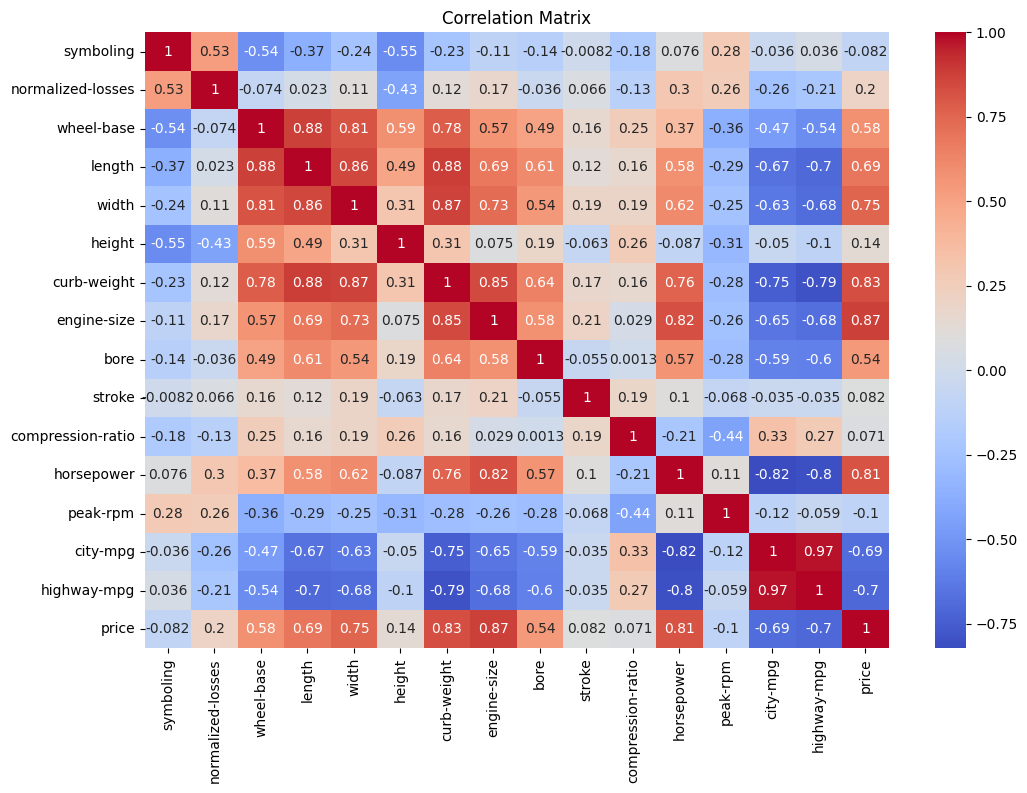

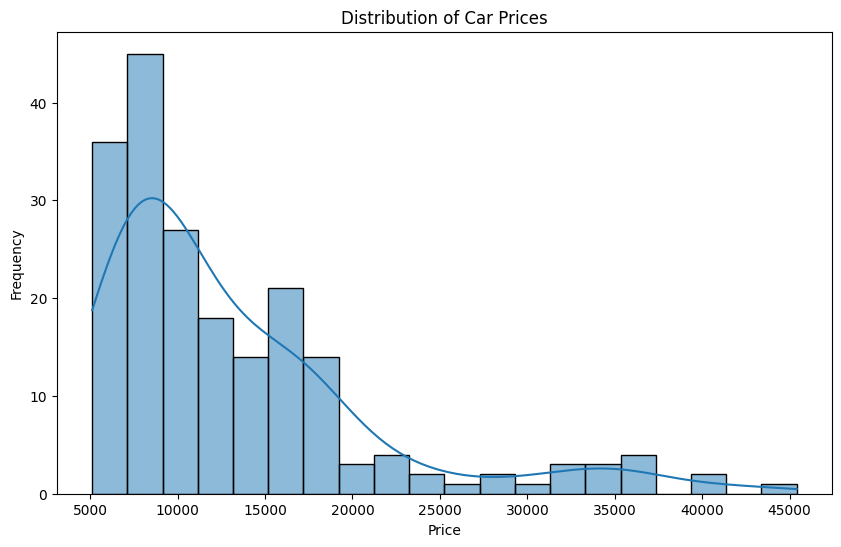

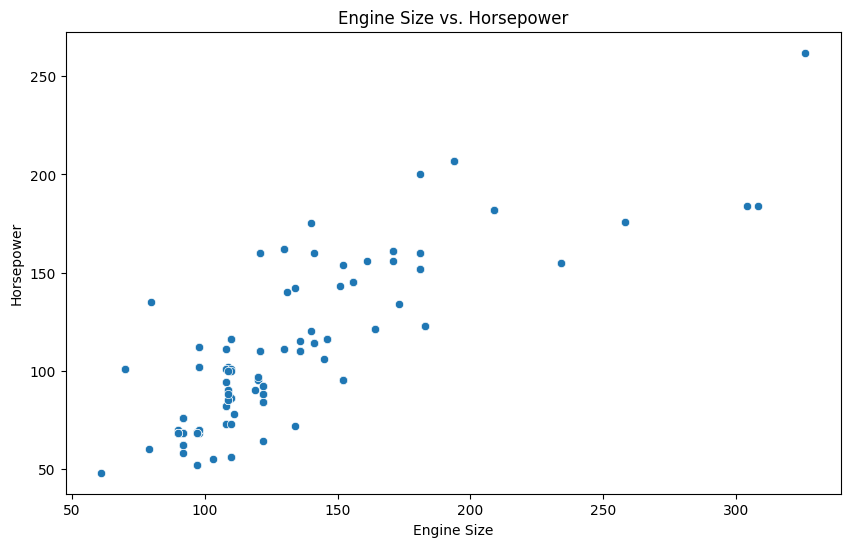

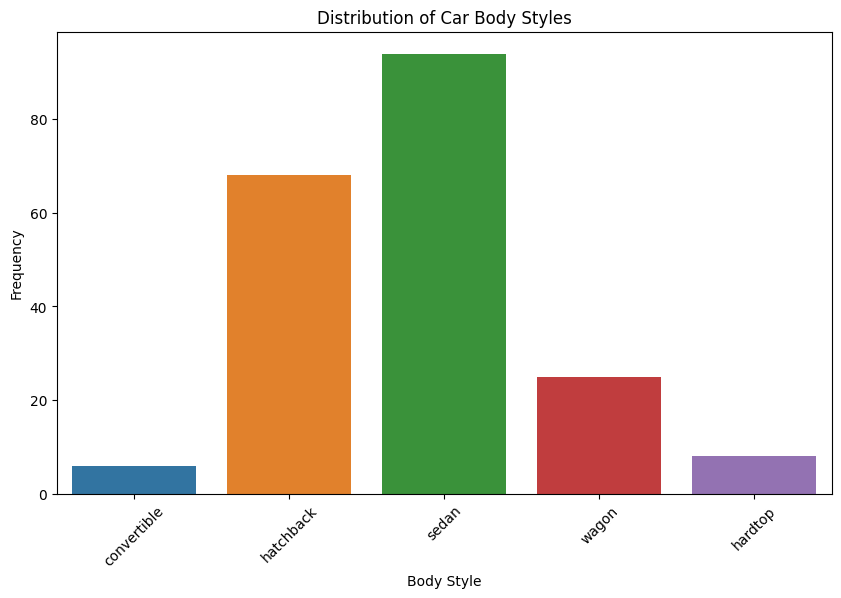

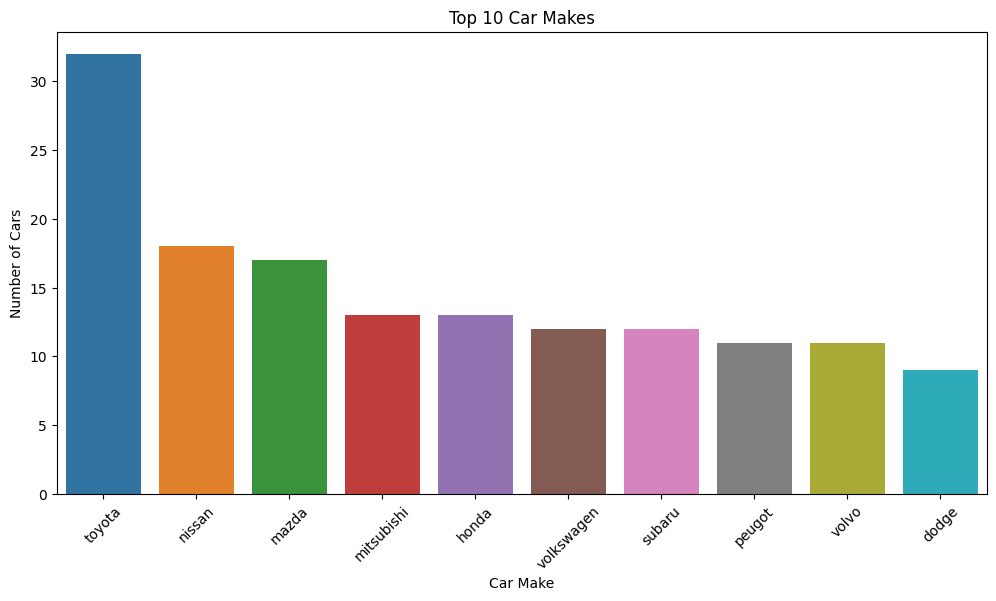

In [53]:
# Select only numeric columns for correlation matrix calculation
numeric_columns_only = auto_df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
numeric_corr_matrix = numeric_columns_only.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Analyze the distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(auto_df['price'], bins=20, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Analyze the relationship between engine size and horsepower
plt.figure(figsize=(10, 6))
sns.scatterplot(data=auto_df, x='engine-size', y='horsepower')
plt.title('Engine Size vs. Horsepower')
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')
plt.show()

# Analyze the distribution of car body styles
plt.figure(figsize=(10, 6))
sns.countplot(data=auto_df, x='body-style')
plt.title('Distribution of Car Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Most common makes of cars
plt.figure(figsize=(12, 6))
top_make = auto_df['make'].value_counts().head(10)
sns.barplot(x=top_make.index, y=top_make.values)
plt.title('Top 10 Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

### Data Stories:

Correlation Matrix Heatmap: This heatmap shows the correlation coefficients between different numeric features in the dataset. Positive values indicate a positive correlation, while negative values indicate a negative correlation. The intensity of color indicates the strength of the correlation.

Distribution of Car Prices: This histogram displays the distribution of car prices. The x-axis represents price ranges, and the y-axis represents the frequency of cars within each price range. The KDE (Kernel Density Estimation) curve gives an estimate of the probability density function of the data.

Engine Size vs. Horsepower Scatterplot: This scatterplot shows the relationship between engine size and horsepower. Each point represents a car, and its position on the plot is determined by its engine size and horsepower. It helps visualize how these two features are related.

Distribution of Car Body Styles: This bar plot displays the distribution of different car body styles. The x-axis represents different body styles, and the y-axis represents the frequency of each body style in the dataset.

Top 10 Car Makes Barplot: This bar plot displays the top 10 car makes by the number of cars in the dataset. The x-axis represents the car makes, and the y-axis represents the number of cars for each make.